In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Importando os dados do sinal de um aquivo csv ou txt
def inicio():
  global n,df
  
  print("-="*20,"\nBEM-VIND@ AO NOSSO TRABALHO DE LAB3","\nFeito por Elder Pereira e Tiscile Cabral\n","-="*20)

  inp = str(input('O arquivo com os dados do sinal é um .txt ou .csv?  '))
  
  if inp == '.csv':
    file = input('Digite o nome do arquivo: ')
    df = pd.read_csv(file + '.csv',sep = ',')
    df.columns = ['Tempo','Amplitude']
    print(df.head())
  elif inp == '.txt':
    df = pd.read_csv(file + ".txt",header = None)
    df.columns = ['Tempo','Amplitude']
    df.to_csv(file+'.csv',index = None)
    print(df.head())
  else:
    inicio()
    
  
  return df

In [5]:
def fourier(df):
    
    print("Esse é o seu sinal")
    plt.plot(df['Tempo'], df['Amplitude'])
    plt.xlabel('Tempo(s)')
    plt.ylabel('Amplitude(V)')
    plt.title('F(s) x s')
   
    
    n = int(input('Informe o número de harmonicas: '))      
    result = []
    P = np.pi
    for i in range(n+1):
        an = (2/P)*integrate.quad(lambda t: df['Amplitude'].iloc[i]* np.cos(2*np.pi*n*df['Tempo'].iloc[i]/P),0,P)[0]
        bn = (2/P)*integrate.quad(lambda t: df['Amplitude'].iloc[i]* np.sin(2*np.pi*n*df['Tempo'].iloc[i]/P),0,P)[0]
        result.append((an,bn))
      
    leng = len(result)
    coef = ['a0']
    for i in range(leng -1):
      coef.append('b'+ str(i))
      
    fouriercoef = pd.DataFrame(list(zip(coef, result)),columns = ['Coeficiente','Valor'])
    print(fouriercoef)
    
  

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= 
BEM-VIND@ AO NOSSO TRABALHO DE LAB3 
Feito por Elder Pereira e Tiscile Cabral
 -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
          Tempo  Amplitude
0  2.000000e-07    -0.0121
1  4.000000e-07    -0.0241
2  8.000000e-07    -0.0483
3  1.600000e-06    -0.0965
4  3.200000e-06    -0.1930
Esse é o seu sinal
   Coeficiente                                            Valor
0           a0  (-0.024199999999806397, -9.679999999974187e-08)
1           b0    (-0.0481999999984576, -3.855999999958869e-07)
2           b1  (-0.09659999998763519, -1.5455999999340543e-06)
3           b2     (-0.192999999901184, -6.175999998945962e-06)
4           b3  (-0.38599999920947203, -2.4703999983135404e-05)
5           b4    (-0.7719999936757762, -9.881599973016643e-05)
6           b5   (-1.5439999494062082, -0.00039526399568266303)
7           b6     (-2.739999715127685, -0.0012494399566994078)
8           b7       (-3.95999914793475, -0.002597759813681729)
9           b8   

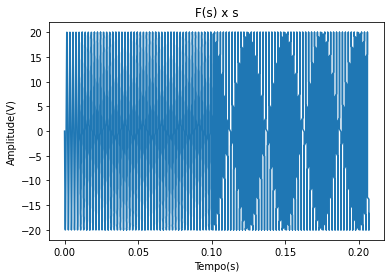

In [6]:
fourier(inicio())